In [21]:
"""
https://rieltor.ua/rovno/flats-sale/?sort=-byprice#9.05/50.7127/26.6092
https://dom.ria.com/uk/realty-prodaja-kvartira-rovno-tsentr-mira-prospekt-26769486.html
https://forbes.ua/money/budivnitstva-ne-zapuskayutsya-popitu-nemae-ale-tsini-ne-padayut-doslidzhennya-rinku-nerukhomosti-pid-chas-viyni-vid-ernst-amp-young-13032023-12337
https://ua.m2bomber.com/stat/448930/view/rivne?type=flat-sell

M2Bomber
dom.ria.com
realtor.ua
forbes.ua

Вартість в доларах із-за нестабільності курса валют 

Будівництво скоротилося, попит обвалився, але ціни не падають. Дослідження ринку нерухомості під час війни від Ernst & Young. 

Датасет для квартир
убрав паркомісце бо майже всі нулі
забрав кількість сот землі
"""


'\nhttps://rieltor.ua/rovno/flats-sale/?sort=-byprice#9.05/50.7127/26.6092\nhttps://dom.ria.com/uk/realty-prodaja-kvartira-rovno-tsentr-mira-prospekt-26769486.html\nhttps://forbes.ua/money/budivnitstva-ne-zapuskayutsya-popitu-nemae-ale-tsini-ne-padayut-doslidzhennya-rinku-nerukhomosti-pid-chas-viyni-vid-ernst-amp-young-13032023-12337\nhttps://ua.m2bomber.com/stat/448930/view/rivne?type=flat-sell\n\nM2Bomber\ndom.ria.com\nrealtor.ua\nforbes.ua\n\nВартість в доларах із-за нестабільності курса валют \n\nБудівництво скоротилося, попит обвалився, але ціни не падають. Дослідження ринку нерухомості під час війни від Ernst & Young. \n\nДатасет для квартир\nубрав паркомісце бо майже всі нулі\nзабрав кількість сот землі\n'

In [2]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# завантаження файлу щоб код працював на інших платформах і незалежно від шляхів до файлів.
file_name = "data.xlsx"
file_path = os.path.join(os.getcwd(), file_name)

if os.path.exists(file_path):
    df = pd.read_excel(file_path)
else:
    print(f"Файл {file_name} не знайдений.")

# Тепер мій датасет зберігається в об'єкті DataFrame з Pandas (df)


In [9]:
# Виведення перших 5 рядків датасету
print(df.head())

      Район Тип житла  Загальна площа (м²)  Кількість кімнат  \
0  12-школа   Будинок                   59                 3   
1  12-школа   Будинок                   90                 2   
2  12-школа  Таунхауз                  151                 3   
3  12-школа   Будинок                  240                 4   
4  12-школа   Будинок                   90                 2   

   1 новий / 2 вторични й ринок  к-сть поверхів будинку  Ціна в $/м²  \
0                             2                       1         1644   
1                             2                       1         1500   
2                             2                       2         1656   
3                             2                       2         1417   
4                             2                       1         1500   

   Своя Парковка (1-є 0-не має)  Земельний участок (соток)  Вартість  \
0                             1                          4     96996   
1                             1       

In [10]:
# Виведення загальної інформації про датасет
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2314 entries, 0 to 2313
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Район                               2314 non-null   object
 1   Тип житла                           2314 non-null   object
 2   Загальна площа (м²)                 2314 non-null   int64 
 3   Кількість кімнат                    2314 non-null   int64 
 4   1 новий / 2 вторични й ринок        2314 non-null   int64 
 5   к-сть поверхів будинку              2314 non-null   int64 
 6   Ціна в $/м²                         2314 non-null   int64 
 7   Своя Парковка (1-є 0-не має)        2314 non-null   int64 
 8   Земельний участок (соток)           2314 non-null   int64 
 9   Вартість                            2314 non-null   int64 
 10  Рік пропозиції купівлі нерухомості  2314 non-null   int64 
dtypes: int64(9), object(2)
memory usage: 199.0+ KB
None


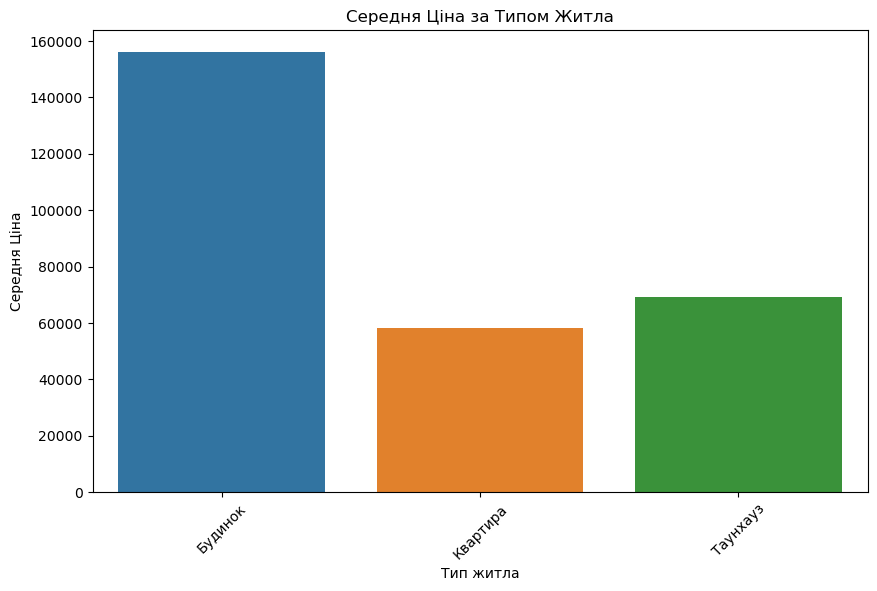

In [11]:
# Групування даних за типом житла і обчислення середньої ціни
grouped_data = df.groupby('Тип житла')['Вартість'].mean().reset_index()

# Створення графіка "bar plot"
plt.figure(figsize=(10, 6))
sns.barplot(x='Тип житла', y='Вартість', data=grouped_data)
plt.xlabel('Тип житла')
plt.ylabel('Середня Ціна')
plt.title('Середня Ціна за Типом Житла')
plt.xticks(rotation=45)  # Обертання підписів по вісі X для кращої читабельності
plt.show()


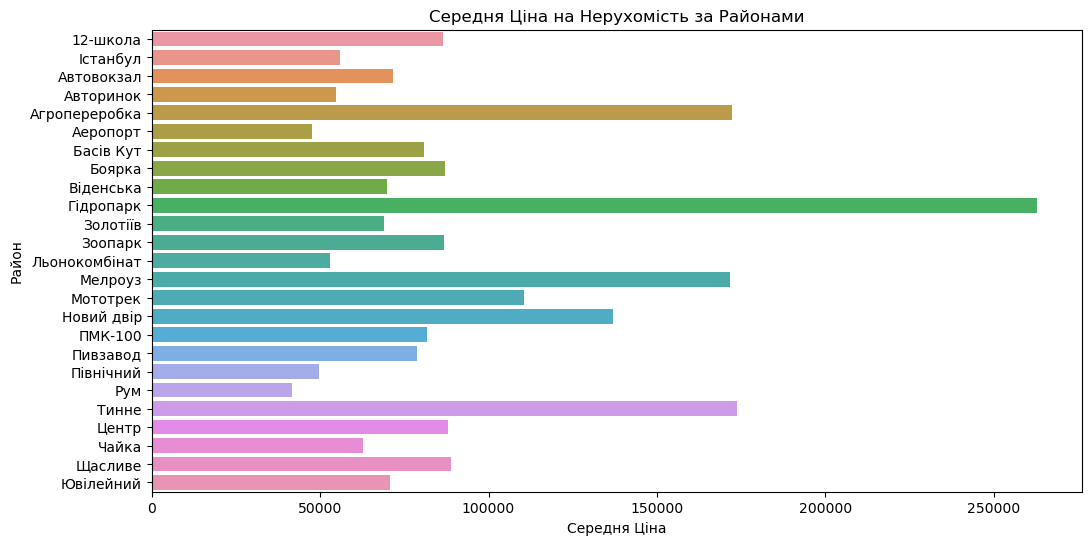

In [7]:

# Групування даних за районом і обчислення середньої ціни
grouped_data = df.groupby('Район')['Вартість'].mean().reset_index()

# Створення графіка "bar plot"
plt.figure(figsize=(12, 6))
sns.barplot(x='Вартість', y='Район', data=grouped_data, orient='h')
plt.xlabel('Середня Ціна')
plt.ylabel('Район')
plt.title('Середня Ціна на Нерухомість за Районами')
plt.show()


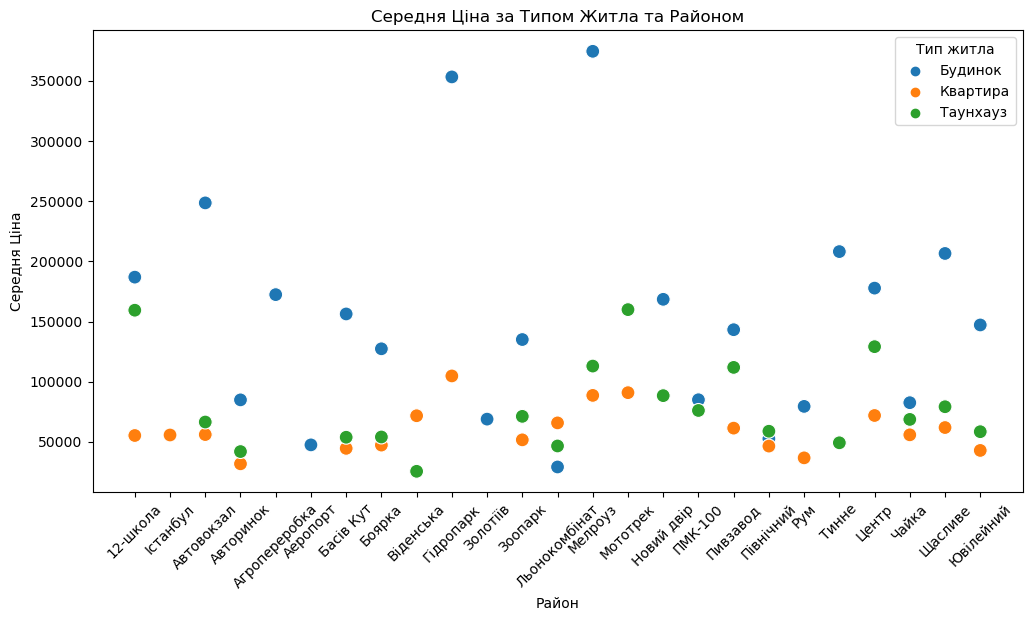

In [8]:
# Групування даних за районом і типом житла і обчислення середньої ціни
grouped_data = df.groupby(['Район', 'Тип житла'])['Вартість'].mean().reset_index()

# Створення графіка
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Район', y='Вартість', hue='Тип житла', data=grouped_data, s=100)
plt.xlabel('Район')
plt.ylabel('Середня Ціна')
plt.title('Середня Ціна за Типом Житла та Районом')
plt.xticks(rotation=45)  # Обертання підписів по вісі X для кращої читабельності
plt.legend(title='Тип житла')
plt.show()

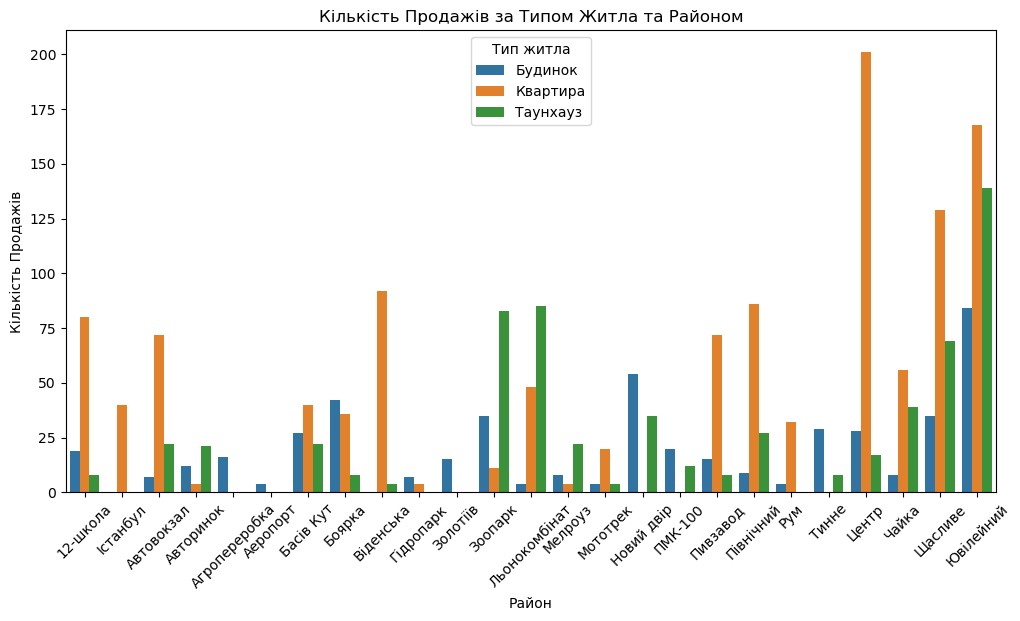

In [9]:
# Групування даних за районом і типом житла і підрахунок кількості продажів
count_data = df.groupby(['Район', 'Тип житла'])['Вартість'].count().reset_index()

# Створення графіка "bar plot"
plt.figure(figsize=(12, 6))
sns.barplot(x='Район', y='Вартість', hue='Тип житла', data=count_data)
plt.xlabel('Район')
plt.ylabel('Кількість Продажів')
plt.title('Кількість Продажів за Типом Житла та Районом')
plt.xticks(rotation=45)  # Обертання підписів по вісі X для кращої читабельності
plt.legend(title='Тип житла')
plt.show()


In [10]:
# Групування даних за районом і типом житла і підрахунок кількості нерухомості, що продається
count_data = df.groupby(['Район', 'Тип житла'])['Вартість'].count().reset_index()


# Вивести всі дані з count_data у вигляді рядка
print(count_data.to_string(index=False))

        Район Тип житла  Вартість
     12-школа   Будинок        19
     12-школа  Квартира        80
     12-школа  Таунхауз         8
     Істанбул  Квартира        40
   Автовокзал   Будинок         7
   Автовокзал  Квартира        72
   Автовокзал  Таунхауз        22
    Авторинок   Будинок        12
    Авторинок  Квартира         4
    Авторинок  Таунхауз        21
Агропереробка   Будинок        16
     Аеропорт   Будинок         4
    Басів Кут   Будинок        27
    Басів Кут  Квартира        40
    Басів Кут  Таунхауз        22
       Боярка   Будинок        42
       Боярка  Квартира        36
       Боярка  Таунхауз         8
    Віденська  Квартира        92
    Віденська  Таунхауз         4
    Гідропарк   Будинок         7
    Гідропарк  Квартира         4
     Золотіїв   Будинок        15
      Зоопарк   Будинок        35
      Зоопарк  Квартира        11
      Зоопарк  Таунхауз        83
Льонокомбінат   Будинок         4
Льонокомбінат  Квартира        48
Льонокомбінат 

In [11]:
# Групування даних за роками і обчислення середнього значення цін
average_prices_by_year = df.groupby(['Рік пропозиції купівлі нерухомості'])['Вартість'].mean().reset_index()

# Додавання стовпця для відсотку зміни
average_prices_by_year['Відсоток зміни'] = average_prices_by_year['Вартість'].pct_change() * 100

# Вивід результату
print(average_prices_by_year)

   Рік пропозиції купівлі нерухомості      Вартість  Відсоток зміни
0                                2020  66860.872624             NaN
1                                2021  77502.884007       15.916650
2                                2022  89911.518900       16.010546
3                                2023  90434.551020        0.581719


In [12]:
# Замінюю категоріальні значення типу житла на числові
df['Тип житла'] = df['Тип житла'].replace({'Квартира': 1, 'Таунхауз': 2, 'Будинок': 3})

# Перегляньте оновлений датасет
df.head()

,Район,Тип житла,Загальна площа (м²),Кількість кімнат,1 новий / 2 вторични й ринок,к-сть поверхів будинку,Ціна в $/м²,Своя Парковка (1-є 0-не має),Земельний участок (соток),Вартість,Рік пропозиції купівлі нерухомості
0,12-школа,3,59,3,2,1,1644,1,4,96996,2023
1,12-школа,3,90,2,2,1,1500,1,6,135000,2023
2,12-школа,2,151,3,2,2,1656,1,4,250056,2023
3,12-школа,3,240,4,2,2,1417,1,7,340080,2023
4,12-школа,3,90,2,2,1,1500,1,6,135000,2023


In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),  # Вхідний шар з відповідною кількістю ознак
    tf.keras.layers.Dense(64, activation='relu'),  # Прихований шар
    tf.keras.layers.Dense(32, activation='relu'),  # Прихований шар
    tf.keras.layers.Dense(1)  # Вихідний шар з однією одиницею для прогнозу ціни
])

model.compile(optimizer='adam', loss='mean_squared_error')  # Функція втрат для регресії

# Навчання моделі
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100
57/57 [==============================] - 0s 1ms/step - loss: 9754385408.0000 - val_loss: 10370892800.0000
Epoch 2/100
57/57 [==============================] - 0s 589us/step - loss: 9751143424.0000 - val_loss: 10364551168.0000
Epoch 3/100
57/57 [==============================] - 0s 562us/step - loss: 9739808768.0000 - val_loss: 10346248192.0000
Epoch 4/100
57/57 [==============================] - 0s 583us/step - loss: 9711909888.0000 - val_loss: 10308240384.0000
Epoch 5/100
57/57 [==============================] - 0s 587us/step - loss: 9658770432.0000 - val_loss: 10241964032.0000
Epoch 6/100
57/57 [==============================] - 0s 568us/step - loss: 9574760448.0000 - val_loss: 10142997504.0000
Epoch 7/100
57/57 [==============================] - 0s 543us/step - loss: 9453451264.0000 - val_loss: 10004498432.0000
Epoch 8/100
57/57 [==============================] - 0s 578us/step - loss: 9290686464.0000 - val_loss: 9827658752.0000
Epoch 9/100
57/57 [========================

In [18]:
# Завантажуємо датасет
data = pd.read_excel("/Users/iWolfer/Desktop/Pycharm/homework(pds6)/Final_project/data.xlsx")

# Перетворюємо категоріальні дані у числові
data = pd.get_dummies(data)

# Визначаємо змінні X та y
X = data.drop("Вартість", axis=1)
y = data["Вартість"]

# Розбиваємо датасет на тренувальний та тестовий
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Створюємо модель
model = XGBRegressor()

# Навчаємо модель
model.fit(X_train, y_train)

# Робимо прогнози на тестовому наборі
y_pred = model.predict(X_test)

# Обчислюємо середню абсолютну помилку
mae = mean_absolute_error(y_test, y_pred)
print(f"Середня абсолютна помилка: {mae}")



Середня абсолютна помилка: 1885.734406638094


In [19]:
print(data["Вартість"].describe())

# `count`: кількість спостережень `mean`: середнє значення `std`: стандартне відхилення 

count      2314.000000
mean      81764.595073
std       76675.378692
min        7580.000000
25%       41025.000000
50%       59040.000000
75%       90006.500000
max      695072.000000
Name: Вартість, dtype: float64


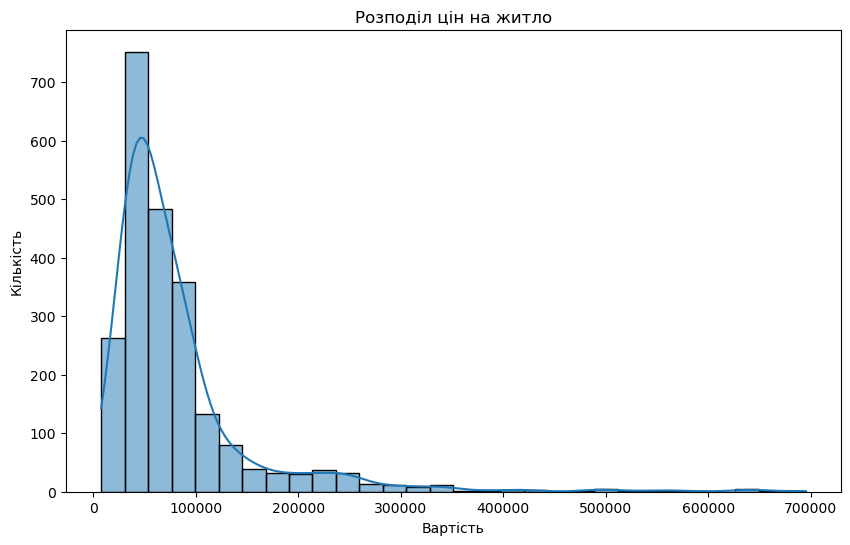

In [20]:
plt.figure(figsize=(10,6))
# Гістограма з лінією оцінки щільності
sns.histplot(data["Вартість"], bins=30, kde=True)
plt.title("Розподіл цін на житло")
plt.xlabel("Вартість")
plt.ylabel("Кількість")
plt.show()